# Лабораторная работа №1 - Персептроны. Процедура обучения Розенблатта
Выполнил: Чекменев Вячеслав

Группа: М8О-407Б-20

Вариант: 27

# Часть 1


## Для первой обучающей выборки построить и обучить персептрон, которая будет правильно относить точки к двум классам.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Входные данные
x1 = np.array([1.1, -1.5, 0.8, 4.1, 2.5, -1.2])
y1 = np.array([-0.3, 3.3, 0.4, -2.2, 2.5, 0.6])
classes1 = np.array([1, 0, 1, 1, 0, 1])

# Инициализация весов и смещения
weights1 = np.zeros(2)
bias1 = 0

# Обучение персептрона
def perceptron_train(x, y, classes, weights, bias, learning_rate=0.1, epochs=100):
    for epoch in range(epochs):
        for i in range(len(x)):
            # Входные данные
            inputs = np.array([x[i], y[i]])

            # Вычисление взвешенной суммы
            summation = np.dot(inputs, weights) + bias

            # Активационная функция (здесь просто ступенька)
            if summation >= 0:
                output = 1
            else:
                output = 0

            # Обновление весов по правилу розенблатта
            weights += learning_rate * (classes[i] - output) * inputs

            # Обновление смещения
            bias += learning_rate * (classes[i] - output)

    return weights, bias

## Обучение персептрона для первой выборки

In [11]:
weights1, bias1 = perceptron_train(x1, y1, classes1, weights1, bias1)


# Построение дискриминантной линии

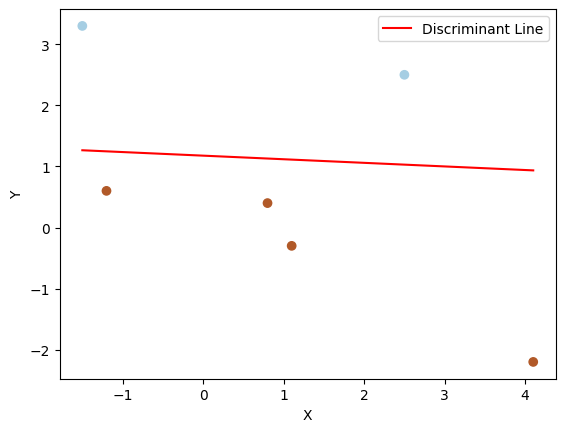

In [12]:
# Отображение результатов
plt.scatter(x1, y1, c=classes1, cmap=plt.cm.Paired, marker='o')
plt.xlabel('X')
plt.ylabel('Y')

x_line = np.linspace(min(x1), max(x1), 100)
y_line = -(weights1[0] * x_line + bias1) / weights1[1]
plt.plot(x_line, y_line, '-r', label='Discriminant Line')

plt.legend()
plt.show()

# Часть 2

Измененное распределение (линейно неразделимо)


In [13]:
classes1_modified = np.array([1, 0, 0, 1, 1, 1])

In [14]:
# Обучение персептрона для измененной выборки
weights1_modified, bias1_modified = perceptron_train(x1, y1, classes1_modified, weights1, bias1)

## Отображение результатов


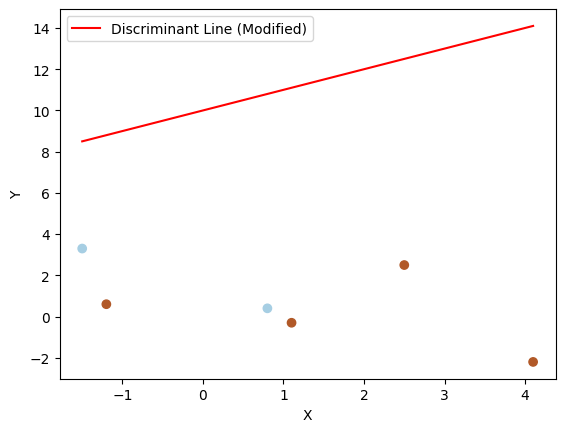

In [15]:
plt.scatter(x1, y1, c=classes1_modified, cmap=plt.cm.Paired, marker='o')
plt.xlabel('X')
plt.ylabel('Y')

# Построение дискриминантной линии для измененной выборки
y_line_modified = -(weights1_modified[0] * x_line + bias1_modified) / weights1_modified[1]
plt.plot(x_line, y_line_modified, '-r', label='Discriminant Line (Modified)')

plt.legend()
plt.show()

# Часть 3

Входные данные для второй выборки

In [16]:
x2 = np.array([3.6, -1.5, -2.8, 1, -3.6, -0.8, 2.2, 3.4])
y2 = np.array([1.3, 4.9, 1.5, -1.2, -4.8, -3.2, -1.3, 2.3])
classes2_1 = np.array([0, 0, 1, 0, 1, 1, 0, 0])
classes2_2 = np.array([0, 1, 1, 0, 0, 0, 0, 0])

## Обучение персептронов


In [17]:
# 1
weights2_1 = np.zeros(2)
bias2_1 = 0
weights2_1, bias2_1 = perceptron_train(x2, y2, classes2_1, weights2_1, bias2_1)

# 2
weights2_2 = np.zeros(2)
bias2_2 = 0
weights2_2, bias2_2 = perceptron_train(x2, y2, classes2_2, weights2_2, bias2_2)


## Отображение результатов

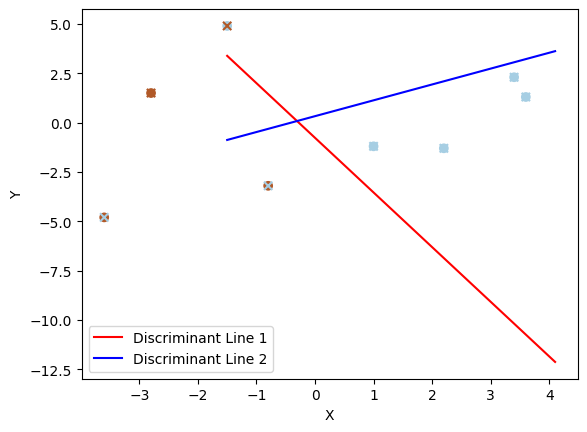

In [18]:
plt.scatter(x2, y2, c=classes2_1, cmap=plt.cm.Paired, marker='o')
plt.xlabel('X')
plt.ylabel('Y')

# Построение дискриминантной линии 1
y_line2_1 = -(weights2_1[0] * x_line + bias2_1) / weights2_1[1]
plt.plot(x_line, y_line2_1, '-r', label='Discriminant Line 1')

# Отображение результатов для еще 2 классов
plt.scatter(x2, y2, c=classes2_2, cmap=plt.cm.Paired, marker='x')
plt.xlabel('X')
plt.ylabel('Y')

# Построение дискриминантной линии 2
y_line2_2 = -(weights2_2[0] * x_line + bias2_2) / weights2_2[1]
plt.plot(x_line, y_line2_2, '-b', label='Discriminant Line 2')

plt.legend()
plt.show()